In [0]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time

In [0]:
def build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count)
  x1 = x1*(square_high-square_low) + square_low

  x0 = np.random.rand(zero_count*100)
  x0 = x0[ (x0<square_low) | (square_high<x0) ]
  x0 = x0[:zero_count]

  x = np.append(x1, x0)

  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),2))
  all_data[:,0] = x

  all_data[:len(x1),1] = 1
  all_data[len(x1):,1] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0]
  y = all_data[:,1]

  plt.xlim(0, 1)

  plt.scatter(x, y)

  return x, y

In [0]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='relu', input_shape=(1,)))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse")

  model.summary()

  return model


# 네모 함수의 학습

## 구간 동일, 갯수 동일

전체 구간은 0.45 ~ 0.65

대상 구간은 0.5 ~ 0.6

데이터는 각각 1만개

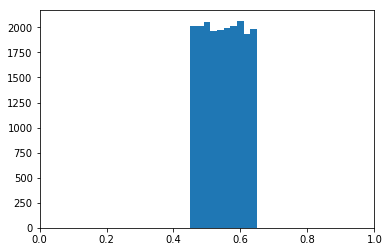

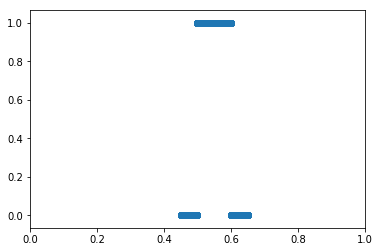

In [165]:
all_low = 0.45
all_high = 0.65
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_259 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_260 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_261 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 2s 118us/sample - loss: 0.0383 - val_loss: 0.0395
Epoch 2/100
18000/18000 [==============================] - 1s 47us/sample - loss: 0.0364 - val_

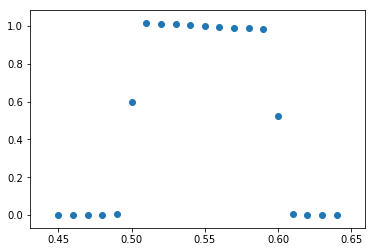

In [166]:
tmodel = build_model()
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

## 좁은 대상, 동등하지 않은 갯수

전체 구간은 0 ~ 1으로 넓어졌다, 대상은 0.5 ~ 0.6.

구간의 넓이만큼 데이터 갯수를 한다.

대상은 9천개, 이외 대상은 1천개




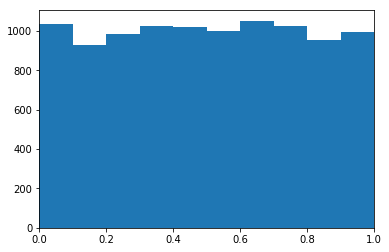

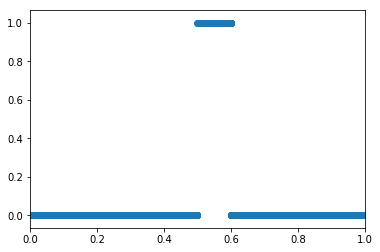

In [167]:
# all_low = 0.45
# all_high = 0.65
all_low = 0.0
all_high = 1.0
square_low = 0.5
square_high = 0.6
# zero_count = 10000
# one_count = 10000
zero_count = 9000
one_count = 1000


train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_262 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_263 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_264 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_265 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 3s 292us/sample - loss: 0.0871 - val_loss: 0.1017
Epoch 2/100
9000/9000 [==============================] - 0s 46us/sample - loss: 0.0836 - val_loss:

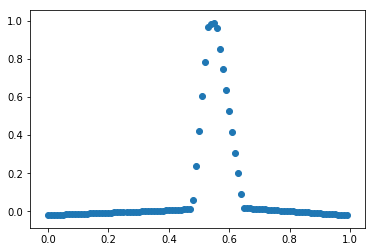

In [168]:
model = build_model()
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

경계 부근이 많이 무디어 졌다.

## 좁은 대상, 동등한 갯수

전체 0 ~ 1 중에 0.5 ~ 0.6이 대상이다. 

대상은 전체의 1/10 이지만 데이터 수는 같게 한다.



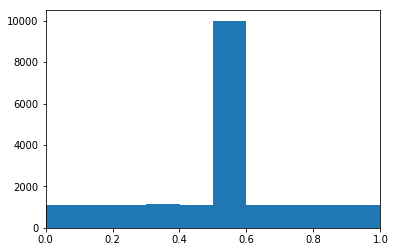

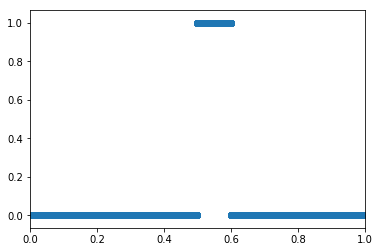

In [161]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_254 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_255 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_256 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_257 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 3s 180us/sample - loss: 0.2188 - val_loss: 0.1845
Epoch 2/100
18000/18000 [==============================] - 1s 46us/sample - loss: 0.1473 - val_

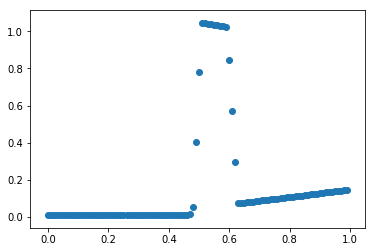

In [164]:
model = build_model()
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

## 아주 좁은 대상, 동등한 갯수

전체 0 ~ 1 중에 0.55 ~ 0.56이 대상이다. 

대상은 전체의 1/100 이지만 데이터 수는 같게 한다.



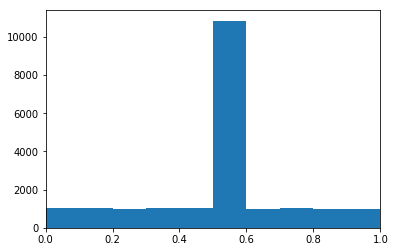

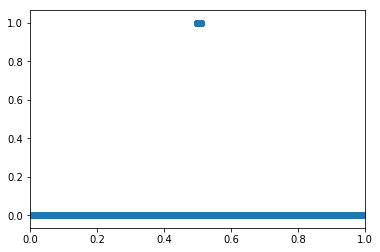

In [178]:
all_low = 0
all_high = 1
# square_low = 0.5
# square_high = 0.6
square_low = 0.5
square_high = 0.51
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_294 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_295 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_296 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_297 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 4s 208us/sample - loss: 0.2494 - val_loss: 0.2322
Epoch 2/100
18000/18000 [==============================] - 1s 51us/sample - loss: 0.2169 - val_

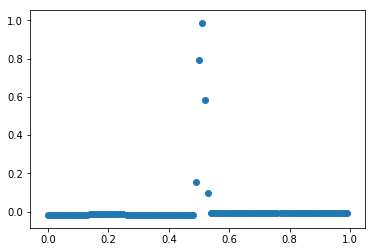

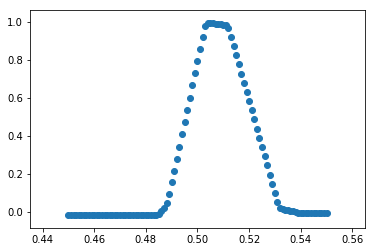

In [181]:
model = build_model()
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)
plt.show()

x_ = np.arange(0.45, 0.55, 0.001)
y_ = model.predict(x_)
plt.scatter(x_, y_)
plt.show()


경계의 구분이 너무 완만하다.

대상이 전체 학습데이터의 범위의 1%에 해당한다.


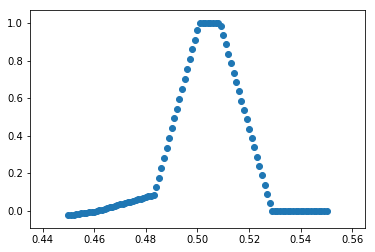

In [180]:
x_ = np.arange(0.45, 0.55, 0.001)
y_ = model.predict(x_)
plt.scatter(x_, y_)
plt.show()

# 2차원 네모 함수

In [0]:
def build_2d_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count, 2)
  x1 = x1*(square_high-square_low) + square_low

  plt.scatter(x1[:,0], x1[:,1])
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.show()

  x0 = np.random.rand(zero_count*100, 2)
  x0 = x0[ (x0[:,0] < square_low) | (x0[:,0] > square_high) | (x0[:,1] < square_low) | (x0[:,1] > square_high) ]
  x0 = x0[:zero_count]

  plt.scatter(x0[:,0], x0[:,1])
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.show()

  x = np.append(x1, x0, axis=0)

  print(x.shape)
  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),3))
  all_data[:,0:2] = x

  all_data[:len(x1),2] = 1
  all_data[len(x1):,2] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0:2]
  y = all_data[:,2]

  return x, y


In [0]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def build_2d_model():

  model = keras.Sequential()
  # model.add(Dense(10, activation='relu', input_shape=(1,)))
  model.add(Dense(10, activation='relu', input_shape=(2,)))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse")

  model.summary()

  return model


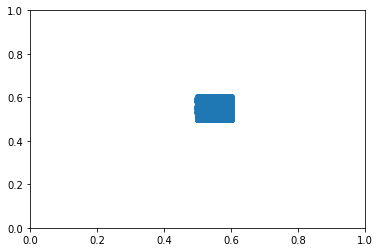

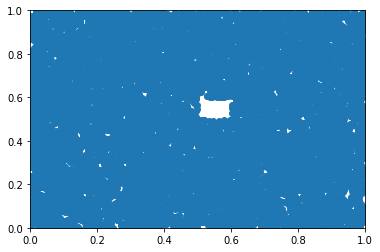

(20000, 2)


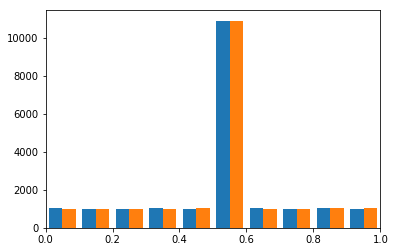

In [79]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_2d_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)  

In [80]:
print(train_x.shape)
print(train_y.shape)

(20000, 2)
(20000,)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_69 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_70 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 63us/sample - loss: 0.1795 - val_loss: 0.1179
Epoch 2/100
18000/18000 [==============================] - 1s 36us/sample - loss: 0.0939 - val_l

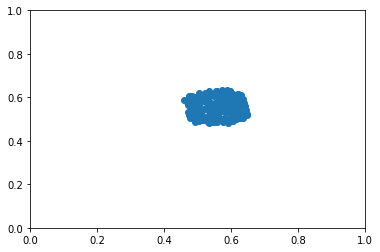

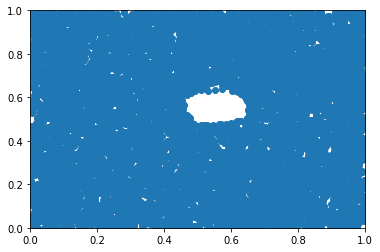

In [82]:
model = build_2d_model()
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.random.rand(10000, 2)
y_ = model.predict(x_)




# 출력이 0.5 보다 큰 x들만 추려서 그림
one_output_index = np.argwhere(y_>0.5)[:,0]
x_of_output_one = x_[one_output_index,:]

plt.scatter(x_of_output_one[:,0], x_of_output_one[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()



# 출력이 0.5 보다 작은 x들만 추려서 그림
zero_output_index = np.argwhere(y_<=0.5)[:,0]
x_of_output_zero = x_[zero_output_index,:]

plt.scatter(x_of_output_zero[:,0], x_of_output_zero[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()



In [0]:
d = model

이후에 사용되도록 학습된 것을 d로 담아두었다.

# 1차원, 2차원 네모 함수 학습에 대한 고찰

1차원의 경우 0.5 ~ 0.6 사이, 2차원의 경우 x1, x2 모두 0.5 ~ 0.6 인경우에만 1이다. 이외에는 0이다.

특정 영역 안에만 있을 경우 1인 함수를 학습한 것이다.


<br>

학습된 모델은 특정 영역에 포함됨 여부를 판단하는 판별기(Discriminator)이다.

# d의 출력을 1로 하는 2차원 데이터를 생성하자.






In [83]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2)) 
model.add(d) # 앞에서 학습된 특정영역 판별기를 뒤에 붙인다.

d.trainable = False

model.compile(optimizer="SGD", loss="mse")

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 22        
_________________________________________________________________
sequential_9 (Sequential)    (None, 1)                 261       
Total params: 523
Trainable params: 262
Non-trainable params: 261
_________________________________________________________________


일반 DNN이다.
1개의 값을 입력으로 받고, 2개의 값을 출력하는.

출력된 값은 위에서 학습된 판별기 d의 입력으로 사용된다.

d는 업데이트 되지 않도록 설정되었다.(trainable=False)

<br>

이 모델의 입력은 난수이다. 그리고 출력은 항상 1이다.

이말은 d에 입력되는 값들은 d가 학습되었던 특정 영역의 값이어야 한다는 것이다.





Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 1s 108us/sample - loss: 0.0249 - val_loss: 4.6570e-05
Epoch 2/100
9000/9000 [==============================] - 0s 39us/sample - loss: 2.9018e-05 - val_loss: 2.0529e-05
Epoch 3/100
9000/9000 [==============================] - 0s 39us/sample - loss: 1.3884e-05 - val_loss: 1.0830e-05
Epoch 4/100
9000/9000 [==============================] - 0s 39us/sample - loss: 7.5464e-06 - val_loss: 6.3265e-06
Epoch 5/100
9000/9000 [==============================] - 0s 39us/sample - loss: 4.6403e-06 - val_loss: 4.1285e-06
Epoch 6/100
9000/9000 [==============================] - 0s 39us/sample - loss: 3.1211e-06 - val_loss: 2.8877e-06
Epoch 7/100
9000/9000 [==============================] - 0s 39us/sample - loss: 2.2804e-06 - val_loss: 2.1883e-06
Epoch 8/100
9000/9000 [==============================] - 0s 39us/sample - loss: 1.7669e-06 - val_loss: 1.7277e-06
Epoch 9/100
9000/9000 [====================

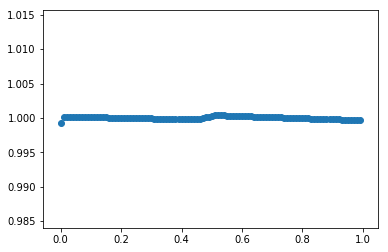

In [84]:
DATA_SIZE = 10000
train_x = np.random.rand(DATA_SIZE) # 0~1 사이의 임의의 값
train_y = np.ones_like(train_x)

model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)


어떤 입력이건 1.0근처의 출력을 보였다.

d의 출력이 1.0근처라는 것이고 이는 d의 입력의 값이 특정 영역(0.5~0.6)사이라는 것이다.

0 ~ 1의 값들이(점들이) 2차원의 [(0.5 ~ 0.6),(0.5 ~ 0.6)] 점들로 매핑되었다. 



## g와 d의 분리

In [0]:
d.trainable = False

g = keras.Sequential()
g.add(Dense(10, activation='relu', input_shape=(1,)))
g.add(Dense(10, activation='relu'))
g.add(Dense(10, activation='relu'))
g.add(Dense(2, activation="sigmoid")) # g의 출력

model = keras.Sequential()
model.add(g)
model.add(d) 

model.compile(optimizer="SGD", loss="mse")

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 1s 108us/sample - loss: 0.0042 - val_loss: 6.7999e-05
Epoch 2/100
9000/9000 [==============================] - 0s 38us/sample - loss: 4.5256e-05 - val_loss: 3.3369e-05
Epoch 3/100
9000/9000 [==============================] - 0s 38us/sample - loss: 2.8818e-05 - val_loss: 2.4405e-05
Epoch 4/100
9000/9000 [==============================] - 0s 38us/sample - loss: 2.2887e-05 - val_loss: 2.0126e-05
Epoch 5/100
9000/9000 [==============================] - 0s 41us/sample - loss: 1.9903e-05 - val_loss: 1.7761e-05
Epoch 6/100
9000/9000 [==============================] - 0s 40us/sample - loss: 1.7911e-05 - val_loss: 1.6000e-05
Epoch 7/100
9000/9000 [==============================] - 0s 38us/sample - loss: 1.6291e-05 - val_loss: 1.4384e-05
Epoch 8/100
9000/9000 [==============================] - 0s 38us/sample - loss: 1.4910e-05 - val_loss: 1.3091e-05
Epoch 9/100
9000/9000 [====================

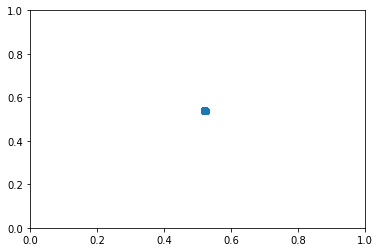

In [86]:
DATA_SIZE = 10000
train_x = np.random.rand(DATA_SIZE) # 0~1 사이의 임의의 값
train_y = np.ones_like(train_x)

model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
generated = g.predict(x_)


plt.scatter(generated[:,0], generated[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

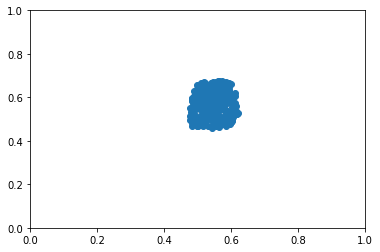

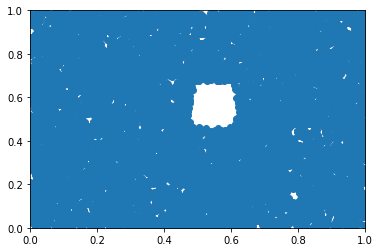

In [87]:
x_ = np.random.rand(10000, 2)
y_ = d.predict(x_)




# 출력이 0.5 보다 큰 x들만 추려서 그림
one_output_index = np.argwhere(y_>0.5)[:,0]
x_of_output_one = x_[one_output_index,:]

plt.scatter(x_of_output_one[:,0], x_of_output_one[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()



# 출력이 0.5 보다 작은 x들만 추려서 그림
zero_output_index = np.argwhere(y_<=0.5)[:,0]
x_of_output_zero = x_[zero_output_index,:]

plt.scatter(x_of_output_zero[:,0], x_of_output_zero[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

0 ~ 1의 임의의 값을 입력으로 하는 g는 모든 입력에 대하여 0.5 ~ 0.6로 출력한다.

0.5 ~ 0.6은 d가 1을 출력하는 영역이다.

g는 d가 1을 출력하는 입력에 해당하는 데이터를 생성할 수 있다.



# d와 g를 동시에 학습

이전에는 특정 영역의 데이터에 대해서는 1의 출력값을, 이외의 데이터에 대해서는 0의 출력값을 갖는 데이터가 필요했다.

d를 먼저 학습시키고 나면, g도 학습이 가능했다.


<br>

그런데 g와 d를 동시에 번갈아 학습시키면 특정 영역의 데이터만 있으면 된다.

특정 영역은 전체 영여 중에 극히 작은 부분이다. 이런 이유로 g가 생성한 데이터는 특정 영역 안에 있지 않을 가능성이 무척 크다. g가 생성한 데이터를 0의 출력값으로 하여 d를 학습시킬 수 있다.

d가 학습되면서 동시에 g도 학습이 된다.

d의 학습에 사용된느 g가 출력값은 점차 특정 영역의 데이터와 가까와 지고, 구별의 경계가 점점 날카로와 진다. 더불어 g가 생성하는 것도 점점 특정 영역과 가까와 진다.



In [107]:
DATA_SIZE = 10000
source_data = np.random.rand(DATA_SIZE, 2)

source_data = source_data*(0.6-0.5) + 0.5




g = keras.Sequential()
g.add(Dense(10, activation='relu', input_shape=(1,)))
g.add(Dense(10, activation='relu'))
g.add(Dense(10, activation='relu'))
g.add(Dense(2, activation="sigmoid"))

g.compile(optimizer="SGD", loss="mse")


d = keras.Sequential()
d.add(Dense(10, activation='relu', input_shape=(2,)))
d.add(Dense(10, activation='relu'))
d.add(Dense(10, activation='relu'))
d.add(Dense(1))

d.compile(optimizer="SGD", loss="mse")


gan = keras.Sequential()
gan.add(g)
gan.add(d)
gan.compile(optimizer="SGD", loss="mse")



ones = np.ones((DATA_SIZE,))
zeros = np.zeros((DATA_SIZE,))


EPOCH = 100
for i in range(EPOCH):

  print("epoch : ",i)

  d.trainable = True
  d.fit(source_data, ones, epochs=1)

  z = np.random.rand(DATA_SIZE)

  generated = g.predict(z)
  d.fit(generated, zeros, epochs=1)

  d.trainable = False
  gan.fit(z, ones, epochs=1)









epoch :  0
10000/10000 [==============================] - 1s 126us/sample - loss: 0.0372
epoch :  1
10000/10000 [==============================] - 0s 45us/sample - loss: 0.0377
epoch :  2
10000/10000 [==============================] - 0s 40us/sample - loss: 0.0380
epoch :  3
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0383
epoch :  4
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0389
epoch :  5
10000/10000 [==============================] - 0s 42us/sample - loss: 0.0390
epoch :  6
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0396
epoch :  7
10000/10000 [==============================] - 0s 41us/sample - loss: 0.0399
epoch :  8
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0404
epoch :  9
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0408
epoch :  10
10000/10000 [==============================] - 0s 40us/sample - loss: 0.0410
epoch :  11
10000/10000 [=====

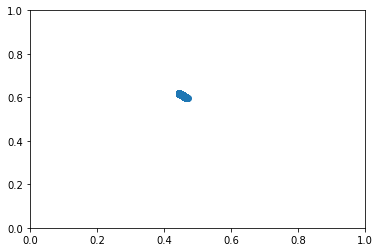

In [108]:
x_ = np.random.rand(1000)

predicted = g.predict(x_)

plt.scatter(predicted[:,0], predicted[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

d는 학습에 사용된 데이터외에 별개의 데이터 없이 학습데이터의 패턴을 학습하였다. 결과적으로 학습된 데이터와 이외의 데이터를 구별할 수 있게 된다.

g는 학습에 사용된 데이터와 유사한 데이터를 출력하도록 학습된다. 결괒거으로 학습된 데이터의 패턴을 갖는 데이터를 생성한다.
